## Polynomial Regression

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# y = 0.8x^2 + 0.9x + 2
X = 6 * np.random.rand(200, 1) - 3
y = 0.8 * X**2 + 0.9 * X + 2 + np.random.randn(200, 1)

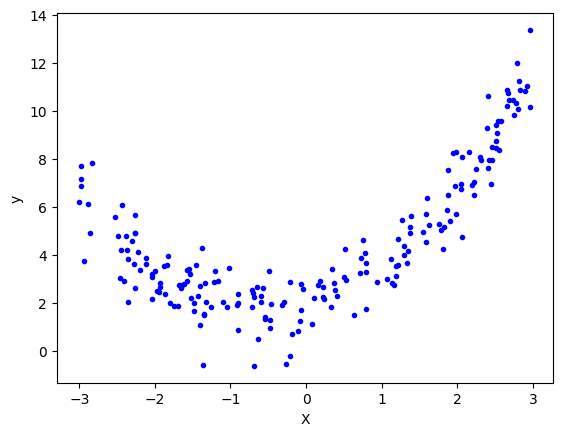

In [3]:
plt.plot(X, y, 'b.')
plt.xlabel("X")
plt.ylabel("y")
plt.show()

In [4]:
from sklearn.model_selection import train_test_split

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2)

In [9]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

In [7]:
lr = LinearRegression()

In [8]:
lr.fit(X_train, y_train)

LinearRegression()

In [10]:
y_pred = lr.predict(X_test)
r2_score(y_test, y_pred)

0.29928767465726

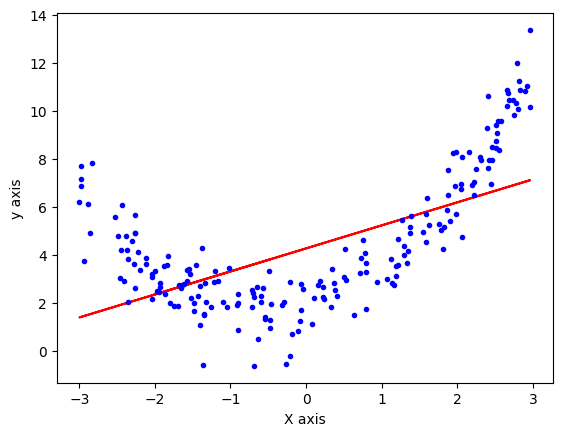

In [11]:
plt.plot(X_train, lr.predict(X_train), color='r')
plt.plot(X, y, 'b.')
plt.xlabel('X axis')
plt.ylabel('y axis')
plt.show()

Applying Polynomial Linear Regression

In [12]:
from sklearn.preprocessing import PolynomialFeatures, StandardScaler

In [13]:
poly = PolynomialFeatures(degree=2, include_bias=True)
X_train_trans = poly.fit_transform(X_train)
X_test_trans = poly.transform(X_test)

In [18]:
print(X_train[0])
print(X_train_trans[0])

[-0.47153234]
[ 1.         -0.47153234  0.22234275]


In [19]:
lr_2 = LinearRegression()
lr_2.fit(X_train_trans, y_train)

LinearRegression()

In [20]:
y_pred_2 = lr_2.predict(X_test_trans)

In [21]:
r2_score(y_test, y_pred_2)

0.8830362630942075

In [24]:
print(lr_2.coef_)
print(lr_2.intercept_)

[[0.         0.83898819 0.74595502]]
[1.99374962]


In [26]:
X_new = np.linspace(-3, 3, 200).reshape(200, 1)
X_new_poly = poly.transform(X_new)
y_new = lr_2.predict(X_new_poly)

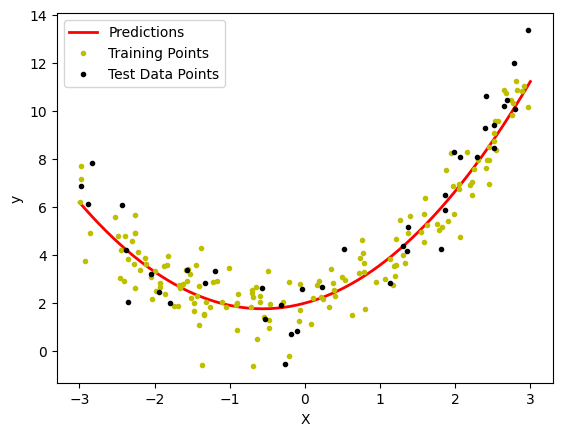

In [39]:
plt.plot(X_new, y_new, 'r-', linewidth=2, label='Predictions')
plt.plot(X_train, y_train, 'y.', label='Training Points')
plt.plot(X_test, y_test, 'k.', label='Test Data Points')
plt.xlabel('X')
plt.ylabel('y')
plt.legend()
plt.show()

In [40]:
from sklearn.pipeline import Pipeline

In [41]:
def polynomial_regression(degree):
    X_new=np.linspace(-3, 3, 100).reshape(100, 1)
    X_new_poly = poly.transform(X_new)

    polybig_features = PolynomialFeatures(degree=degree, include_bias=False)
    std_scaler = StandardScaler()
    lin_reg = LinearRegression()
    polynomial_regression = Pipeline([
            ("poly_features", polybig_features),
            ("std_scaler", std_scaler),
            ("lin_reg", lin_reg),
        ])
    polynomial_regression.fit(X, y)
    y_newbig = polynomial_regression.predict(X_new)
    plt.plot(X_new, y_newbig,'r', label="Degree " + str(degree), linewidth=2)

    plt.plot(X_train, y_train, "b.", linewidth=3)
    plt.plot(X_test, y_test, "g.", linewidth=3)
    plt.legend(loc="upper left")
    plt.xlabel("X")
    plt.ylabel("y")
    plt.axis([-3, 3, 0, 10])
    plt.show()

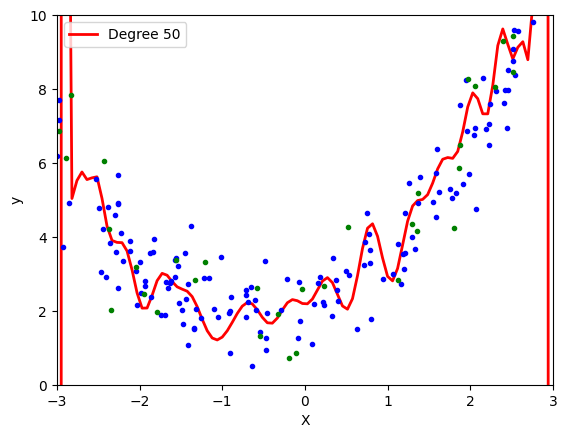

In [44]:
polynomial_regression(50)

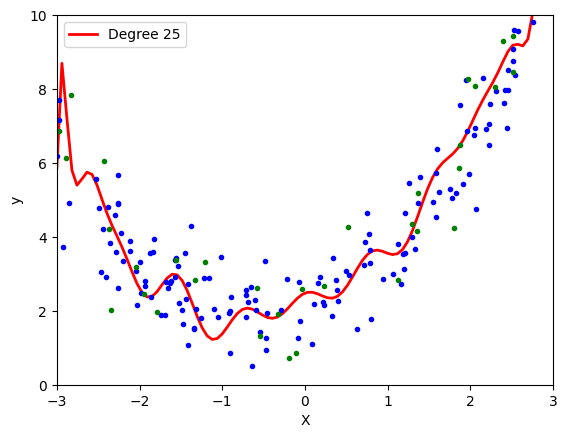

In [45]:
polynomial_regression(25)

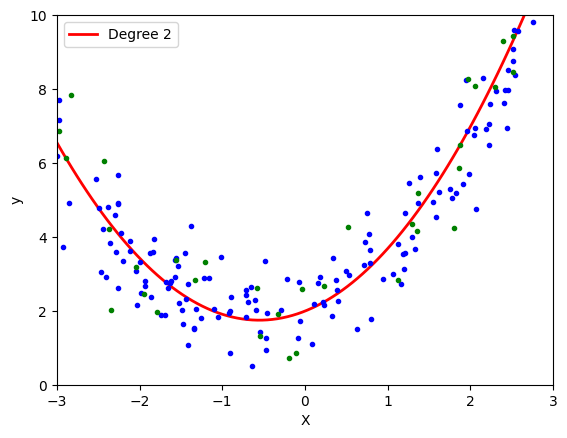

In [46]:
polynomial_regression(2)